Hunter Bennett  
Glass Lab  
DESeq investigation of LXR RNA Seq Data  
Created 180320 | Last updated 180320
_____
DESeq differential gene calling of LXR knockout mice treated with CCL4 compared to wild type.

In [1]:
# load DESeq2
library(DESeq2)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Warning message:


In [28]:
# load in files prepared by python worklflow in the notebook 180103_ATAC_DiffPeaks
outdir = '/home/h1bennet/LXR/results/180320_DMHCA/'
col_data = read.csv(paste0(outdir, 'deseq_coldata.txt'), sep='\t')
gene_counts = read.csv(paste0(outdir, 'rnaseq_matrix_condenseGenes_exons_raw_deseq.txt'), sep='\t', row.names=1)

In [7]:
# remove gene column from gene counts
gene_mat = gene_counts[, -ncol(gene_counts)]

In [8]:
# set baseline levels for the categories we will use in our model
col_data$genotype <- relevel(col_data$genotype, ref='C57BL6')


In [9]:
head(col_data)

X,subject,sample_type,path,genotype,tx,cage,group,group_unique,color
1,mouse_C57B6J_M_KupfferTim4Pos_RNA_polyA_DMHCA50mgperkg12h_JSSTDT_DMHCA2_JSS_l20170916_ACTTGA,kupffer,/data/mm10/Kupffer/RNA/mouse_C57B6J_M_KupfferTim4Pos_RNA_polyA_DMHCA50mgperkg12h_JSSTDT_DMHCA2_JSS_l20170916_ACTTGA,C57BL6,DMHCA,DMHCA2,C57BL6_DMHCA,C57BL6_DMHCA_DMHCA2,#2b8cbe
2,mouse_C57B6J_M_KupfferTim4Pos_RNA_polyA_DMHCA50mgperkg12h_JSSTDT_DMHCA3_JSS_l20170916_GATCAG,kupffer,/data/mm10/Kupffer/RNA/mouse_C57B6J_M_KupfferTim4Pos_RNA_polyA_DMHCA50mgperkg12h_JSSTDT_DMHCA3_JSS_l20170916_GATCAG,C57BL6,DMHCA,DMHCA3,C57BL6_DMHCA,C57BL6_DMHCA_DMHCA3,#2b8cbe
3,mouse_C57Bl6_M_Kupffer_RNA_polyA_T0901317ip50mgperkg12h_JSSTDT_T09ip1_JSS_l20170916_ACAGTG,kupffer,/data/mm10/Kupffer/RNA/mouse_C57Bl6_M_Kupffer_RNA_polyA_T0901317ip50mgperkg12h_JSSTDT_T09ip1_JSS_l20170916_ACAGTG,C57BL6,T09,T09ip1,C57BL6_T09,C57BL6_T09_T09ip1,#a6bddb
4,mouse_C57Bl6_M_Kupffer_RNA_polyA_T0901317ip50mgperkg12h_JSSTDT_T09ip2_JSS_l20170916_GCCAAT,kupffer,/data/mm10/Kupffer/RNA/mouse_C57Bl6_M_Kupffer_RNA_polyA_T0901317ip50mgperkg12h_JSSTDT_T09ip2_JSS_l20170916_GCCAAT,C57BL6,T09,T09ip2,C57BL6_T09,C57BL6_T09_T09ip2,#a6bddb
6,mouse_C57Bl6_M_Kupffer_RNA_polyA_VehicleMpyrol_JSSTDT_MPYR1_JSS_l20170916_CGATGT,kupffer,/data/mm10/Kupffer/RNA/mouse_C57Bl6_M_Kupffer_RNA_polyA_VehicleMpyrol_JSSTDT_MPYR1_JSS_l20170916_CGATGT,C57BL6,Control,MPYR1,C57BL6_Control,C57BL6_Control_MPYR1,#bdbdbd
7,mouse_C57Bl6_M_Kupffer_RNA_polyA_VehicleMpyrol_JSSTDT_MPYR2_JSS_l20170916_TGACCA,kupffer,/data/mm10/Kupffer/RNA/mouse_C57Bl6_M_Kupffer_RNA_polyA_VehicleMpyrol_JSSTDT_MPYR2_JSS_l20170916_TGACCA,C57BL6,Control,MPYR2,C57BL6_Control,C57BL6_Control_MPYR2,#bdbdbd


### Run DESeq analysis with interaction term model

In [11]:
dds <- DESeqDataSetFromMatrix(countData = gene_mat,
                             colData = col_data,
                             design = ~tx)

converting counts to integer mode


In [12]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


### Lets look at the mean-variance relationship in the data

In [13]:
vsd <- vst(dds, blind=FALSE)
rld <- rlog(dds, blind=FALSE)

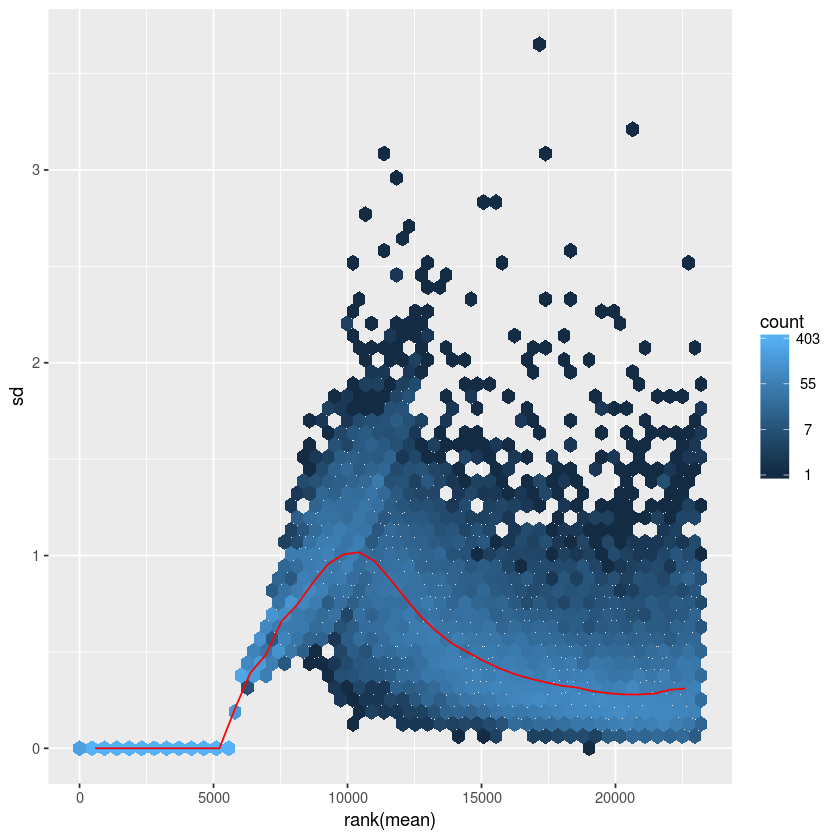

In [14]:
# this gives log2(n + 1)
ntd <- normTransform(dds)
library("vsn")
meanSdPlot(assay(ntd))

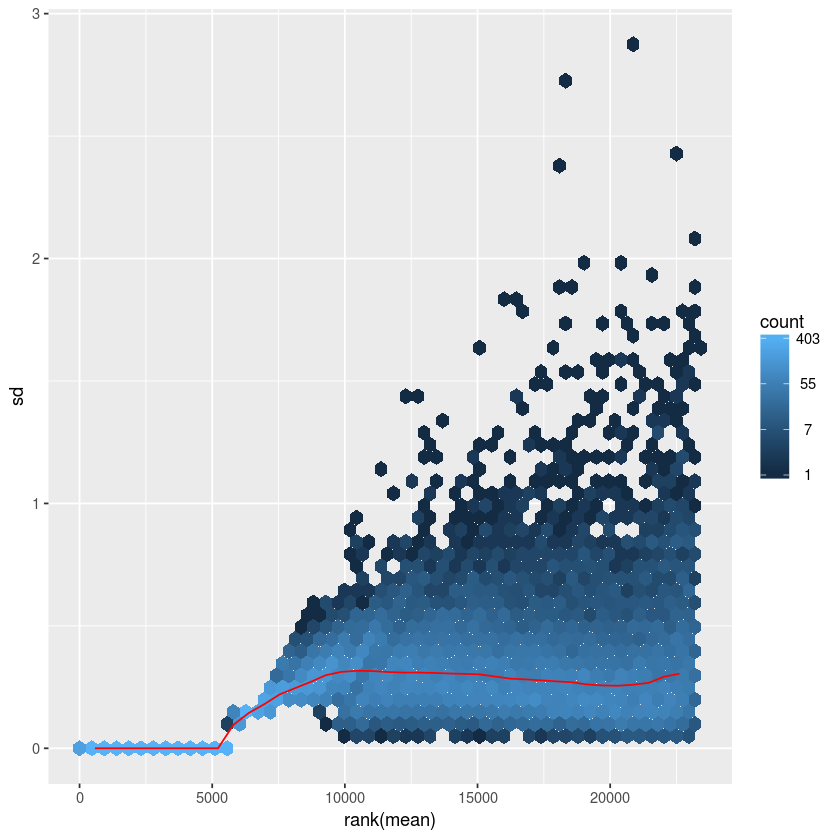

In [15]:
meanSdPlot(assay(vsd))

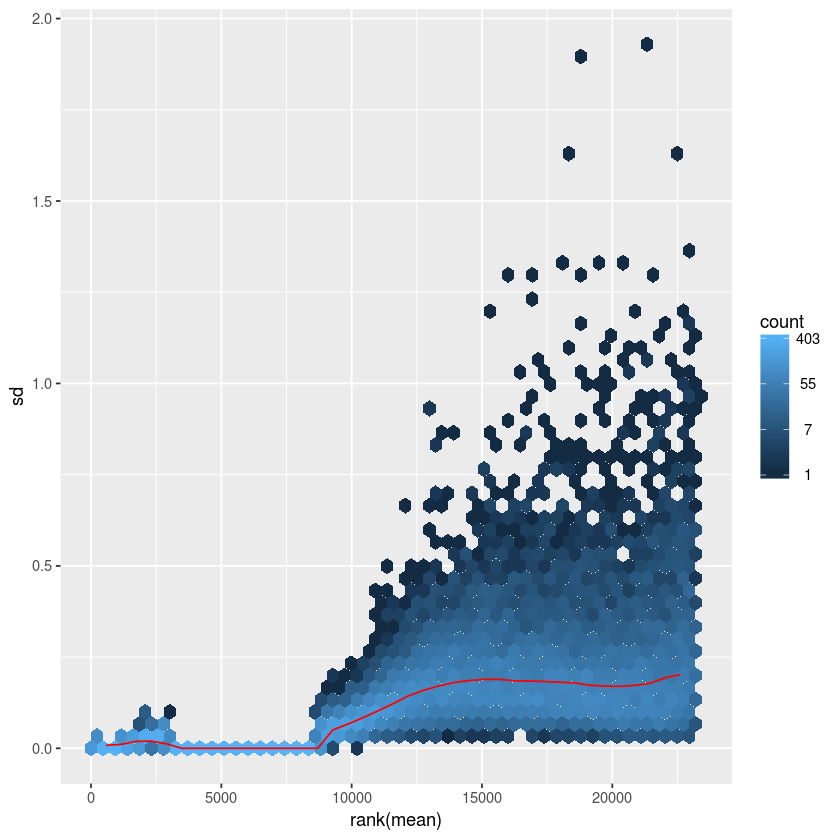

In [16]:
meanSdPlot(assay(rld))

### Lets take a look at the sample distances...

In [17]:
sampleDists <- dist(t(assay(vsd)))

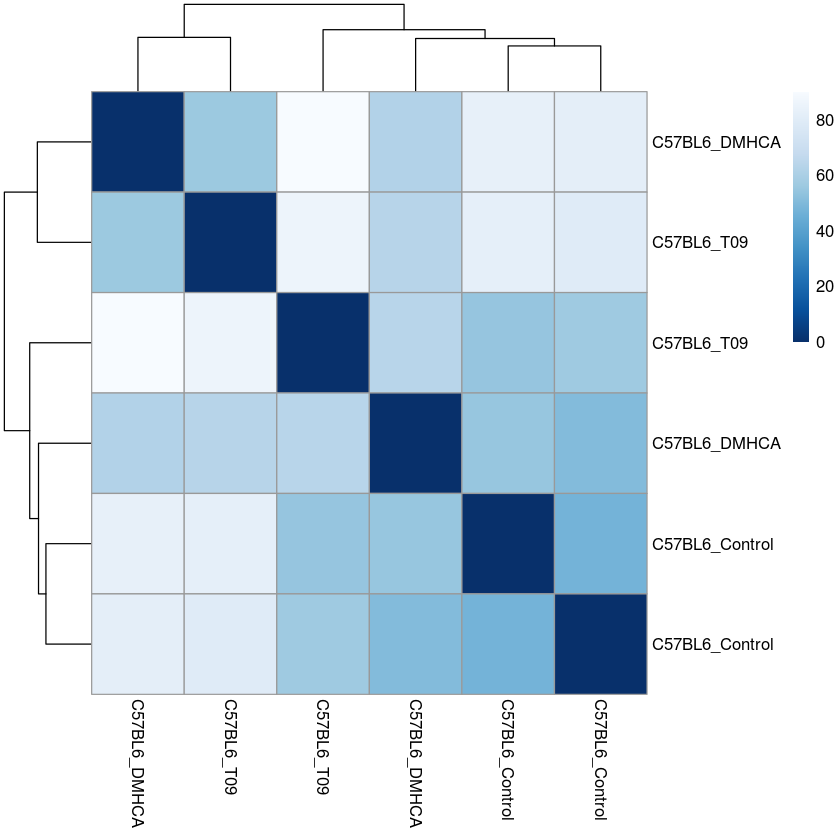

In [18]:
library("RColorBrewer")
library('pheatmap')
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- vsd$group
colnames(sampleDistMatrix) <- vsd$group
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

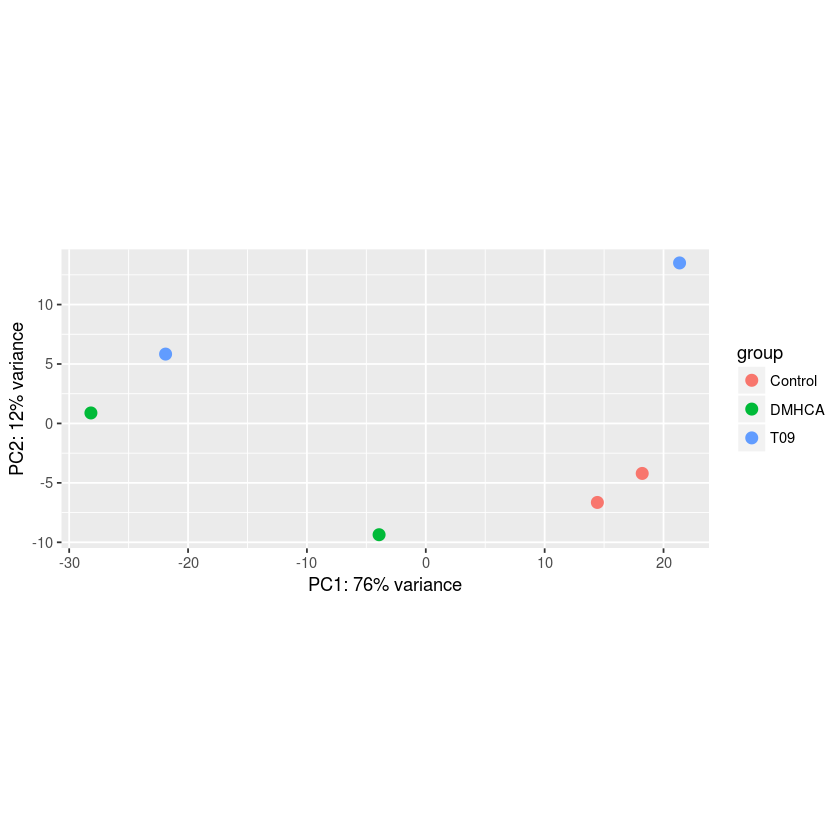

In [20]:
plotPCA(vsd, intgroup=c("tx"))


### Now we will do a differential gene analysis

In [21]:
table(col_data$tx)


Control   DMHCA     T09 
      2       2       2 

In [22]:
# diet effect for tim4pos in controls
res <- results(dds, contrast=c('tx', 'DMHCA', 'Control'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "DMHCA_vs_Control_Deseq_results.txt"), sep='\t')

In [23]:
summary(res)


out of 17398 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 31, 0.18% 
LFC < 0 (down)   : 8, 0.046% 
outliers [1]     : 0, 0% 
low counts [2]   : 6297, 36% 
(mean count < 11)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



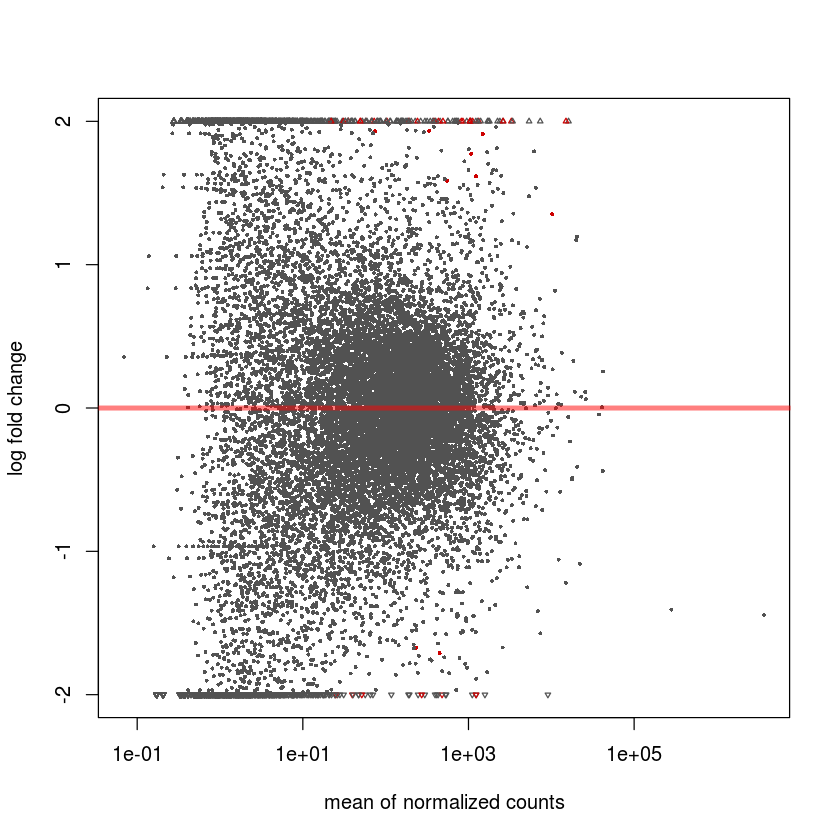

In [24]:
plotMA(res, ylim=c(-2,2))

In [25]:
res <- results(dds, contrast=c('tx', 'T09', 'Control'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "T09_vs_Control_Deseq_results.txt"), sep='\t')

In [26]:
summary(res)


out of 17398 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 52, 0.3% 
LFC < 0 (down)   : 18, 0.1% 
outliers [1]     : 0, 0% 
low counts [2]   : 7291, 42% 
(mean count < 20)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



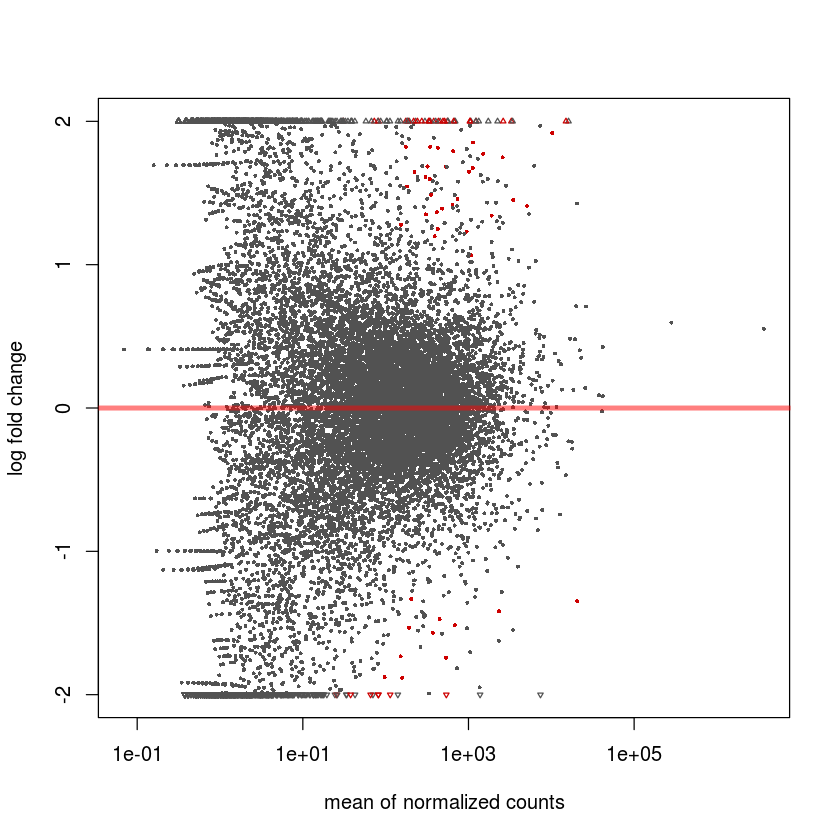

In [27]:
plotMA(res, ylim=c(-2,2))